<p  style="z-index: 101;background: #fde073;text-align: center;line-height: 2.5;overflow: hidden;font-size:22px;">Please <a href="https://github.com/ECSIM/opem#cite" target="_blank">cite us</a> if you use the software</p>

#  Padulles-Amphlett Dynamic Model

### Version 1.2

<ul>
    <li><a href="#Overview">Overview</a></li>
    <li><a href="#Nernst-Voltage">Nernst Voltage</a></li>
    <li><a href="#PEM-Losses-Model">PEM Losses Model</a></li>
    <ul>
        <li><a href="#Activation">Activation</a></li>
        <li><a href="#Ohmic">Ohmic</a></li>
        <li><a href="#Concentration">Concentration</a></li>
        <li><a href="#VCell-&-VStack">VCell & VStack</a></li>
    </ul>
    <li><a href="#Power-of-PEMFC">Power of PEMFC</a></li>
    <li><a href="#Efficiency-of-PEMFC">Efficiency of PEMFC</a></li>
    <li><a href="#Linear-Approximation">Linear Approximation</a></li>
    <li><a href="#Overall-Parameters">Overall Parameters</a></li>
    <li><a href="#Full-Run">Full Run</a></li>
    <li><a href="#Plot">Plot</a></li>
    <li><a href="#Parameters">Parameters</a></li>
    <li><a href="#Reference">Reference</a></li>   
</ul>

## Overview

<p style="text-align:justify;">
The Padulles dynamic model can predict the transient response of cell voltage, temperature of the cell, hydrogen/oxygen out flow rates and cathode and anode channel temperatures/pressures under sudden change in load current. Hence, a dynamic fuel cell simulation is developed in this model, which incorporates the dynamics of flow and pressure in the anode and cathode channels and mass/ heat transfer transient features in the fuel cell body.
<br/>This model is based on several assumptions: 
<ol>    
<li>The stack is fed with hydrogen and air</li>    
<li>Cell temperature is stable at all times</li>   
<li>The ratio of pressures between the interior and exterior of the electrode channels is large</li>  
<li>The channels that transport gases along the electrodes have a fixed volume </li>    
<li>Only source of voltage loss is ohmic polarization</li>     
<li>Nernst equation can be applied too</li>  
</ol>
</p>

<p style="text-align:justify;">
This model is an integration of Padulles-Hauer dynamic model with Amphlett static model. The advantage of this dynamic model is using Amphlett equation for simulating the polarization values. Amphlett model as the most complicated and preferable static model, but the most precise. Based on this model, the obtained polarization voltage is identical to the experimental results.  
</p>    

<div style="text-align:center;">
    
<img src="images/Padulles-Amphlett-Diagram.jpg">  
<p style="text-align:center;">Fig1. Padulles-Amphlett Dynamic Model Block Diagram </p>
    
</div>

## Nernst Voltage

$$E_{Nernst}=N_0\times [E_0+\frac{RT}{2F}ln(\frac{P_{H_2}\times \sqrt{P_{O_2}}}{P_{H_2O}})]$$

$$P_{H_2}=\frac{\frac{1}{K_{H_2}}}{1+\tau_{H_2}^{(s)}}[(q_{H_2}^{(inlet)}-(2\times K_r \times i)]$$

$$\frac{q_{H_2}^{(inlet)}}{q_{methanol}}=\frac{CV}{\tau_{1}^{(s)}+(\tau_{2}^{(s)})^2+(\tau_{1}+\tau_{2})^{(s)}+1}$$

$$P_{O_2}=\frac{\frac{1}{K_{O_2}}}{1+\tau_{O_2}^{(s)}}[(q_{O_2}^{(inlet)}-(K_r \times i)]$$

$$P_{H_2O}=\frac{\frac{1}{K_{H_2O}}}{1+\tau_{H_2O}^{(s)}}[(q_{H_2O}^{(inlet)}-(2\times K_r \times i)]$$

$$K_r=\frac{N_0}{4F}$$

$$q_{O_2}^{(inlet)}=\frac{q_{H_2}^{(inlet)}}{r_{h-o}}$$

$$q_{H_2O}^{(inlet)}=q_{H_2}^{(inlet)}$$

In [1]:
from opem.Dynamic.Padulles_Amphlett import qH2_Calc,Kr_Calc,qO2_Calc,PH2_Calc,PO2_Calc,PH2O_Calc,Enernst_Calc

In [2]:
qH2=qH2_Calc(qMethanol=0.0002,CV=2,t1=2,t2=2)
qH2

3.6363636363636364e-05

In [3]:
Kr=Kr_Calc(N0=5)
Kr

1.2955435375179044e-08

In [4]:
qO2=qO2_Calc(qH2=qH2,rho=1.168)
qO2

3.113325031133251e-05

In [5]:
PH2=PH2_Calc(KH2=0.0000422,tH2=3.37,Kr=Kr,I=1,qH2=qH2)
PH2

0.19704428889827239

In [6]:
PO2=PO2_Calc(KO2=0.0000211,tO2=6.74,Kr=Kr,I=1,qO2=qO2)
PO2

0.1905549730945132

In [7]:
PH2O=PH2O_Calc(KH2O=0.000007716,tH2O=18.418,Kr=Kr,I=1,qH2O=qH2)
PH2O

0.2425275190047356

In [8]:
Enernst=Enernst_Calc(E0=0.6,N0=5,T=343, PH2=PH2, PO2=PO2,PH2O=PH2O)
Enernst

2.9234016588243374

## PEM Losses Model

### Activation

$$\eta_{activation}=\xi_{1}+\xi_{2}T+\xi_{3}T[ln(C_{O_{2}})]+\xi_{4}T[ln(i)]$$

$$\xi_{1}=-0.948$$

$$\xi_{2}=0.00286+0.0002\times ln(A)+(4.3\times10^{-5})[ln(C_{H_{2}})]$$

$$\xi_{3}=7.6\times10^{-5}$$

$$\xi_{4}=-1.93\times10^{-4}$$

$$C_{H_{2}}=\frac{P_{H_2}}{1.09\times10^{6}\times exp(\frac{77}{T})}$$

$$C_{O_{2}}=\frac{P_{O_2}}{5.08\times10^{6}\times exp(\frac{-498}{T})}$$

In [9]:
from opem.Dynamic.Padulles_Amphlett import Eta_Act_Calc
Eta_Act=Eta_Act_Calc(T=343,PO2=PO2 , PH2=PH2, i=2, A=50.6)
Eta_Act

0.38390602046791616

### Ohmic

$$\eta_{ohmic}=i(R_{electronic}+R_{Proton})$$

$$R_{Proton}=\frac{\rho_m\times I}{A}$$

$$\rho_m=\frac{181.6[1+0.03(\frac{i}{A})+0.062(\frac{T}{303})^2(\frac{i}{A})^{2.5}]}{[\lambda-0.634-3(\frac{i}{A})]exp[4.18(\frac{T-303}{T})]}$$

* R-Electronic Should be approximately constant over the relatively narrow
temperature range of PEM fuel cell operation.
Therefore, the parameter R-Electronic can be taken as a constant, but
is generally difficult to predict and, therefore, is initially an unknown.

In [10]:
from opem.Dynamic.Padulles_Amphlett import Eta_Ohmic_Calc
Eta_Ohmic=Eta_Ohmic_Calc(i=2, l=0.0178, A=50.6, T=343, lambda_param=23, R_elec=0)
Eta_Ohmic

0.003531492225469087

### Concentration

$$B=\frac{RT}{nF}$$

$$\eta_{Concentration}=-B\times ln(1-\frac{J}{J_{Max}})$$

$$J=\frac{i}{A}$$

$$J_{Max}=\frac{i_L}{A}$$

In [11]:
from opem.Dynamic.Padulles_Amphlett import Eta_Conc_Calc
Eta_Conc=Eta_Conc_Calc(i=2, A=50.6, B=0.016, JMax=1.5)
Eta_Conc

0.0004272617031588504

### FC Voltage

$$Loss=\eta_{Activation}+\eta_{Ohmic}+\eta_{Concentration}$$

$$V_{Fuelcell}=E_{Nernst}-N_0\times Loss$$

In [12]:
from opem.Dynamic.Padulles_Amphlett import Loss_Calc,Vcell_Calc
Loss=Loss_Calc(Eta_Act=Eta_Act,Eta_Conc=Eta_Conc,Eta_Ohmic=Eta_Ohmic)
Loss

0.38786477439654415

In [13]:
FC_Voltage=Vcell_Calc(Enernst=Enernst, Loss=Loss, N=5)
FC_Voltage

0.9840777868416166

## Power of PEMFC

$$P=V_{cell}\times i$$

$$P_{Thermal}=i\times(N \times E_{th}-V_{Stack})$$

$$E_{th}=\frac{-\Delta H}{nF}=1.23V$$

In [14]:
from opem.Dynamic.Padulles_Amphlett import Power_Calc,Power_Thermal_Calc
Power=Power_Calc(Vcell=FC_Voltage,i=2)
Power

1.9681555736832332

In [15]:
Power_Thermal_Calc(VStack=FC_Voltage,N=5,i=2)

10.331844426316767

## Efficiency of PEMFC

$$\eta=\frac{\mu_F\times V_{Fuelcell}}{N_0\times HHV}$$

In [16]:
from opem.Dynamic.Padulles_Amphlett import Efficiency_Calc
Efficiency_Calc(Vcell=FC_Voltage,N=5)

0.1261638188258483

## Linear Approximation

Sometimes quick calculations regarding fuel cell efficiency–power-size relationships need to be made. Linear approximation is a good method to find a rough estimate of the value of polarization function at a particular point. A linear polarization curve has the following form:
$$V_{cell}=V_0-kI$$
where V0 is the intercept (actual open circuit voltage is always higher) and k is the slope of the curve.

* Notice : <a href="https://en.wikipedia.org/wiki/Simple_linear_regression">Simple linear regression</a> used for this approximation

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
    </tr> 
    <tr>
        <td>$$V_0$$</td>
        <td style="text-align:center;">Intercept of the curve obtained by linear approximation</td>
        <td>$$V$$</td>
    </tr>
    <tr>
        <td>$$k$$</td>
        <td style="text-align:center;">Slope of the curve obtained by linear approximation</td>
        <td>$$A^{-1}$$</td>
    </tr>
    <tr>
        <td>$$P_{max}$$</td>
        <td style="text-align:center;">Maximum power obtained by linear approximation</td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$V_{FC}|P_{max}$$</td>
        <td style="text-align:center;">Cell voltage at maximum power obtained by linear approximation</td>
        <td>$$V$$</td>
    </tr>
   
     
    
    
    
</table>

* Notice : These parameters are only available in HTML report

## Overall Parameters

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
    </tr> 
    <tr>
        <td>$$\eta|P_{Max}$$</td>
        <td style="text-align:center;">Cell efficiency at maximum power</td>
        <td>$$--$$</td>
    </tr>
    <tr>
        <td>$$P_{Max}$$</td>
        <td style="text-align:center;">Maximum power </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$P_{Elec} $$</td>
        <td style="text-align:center;">Total electrical power </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$P_{Thermal} $$</td>
        <td style="text-align:center;">Total thermal power   </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$V_{FC}|P_{Max}$$</td>
        <td style="text-align:center;">Cell voltage at maximum power </td>
        <td>$$V$$</td>
    </tr>
   
     
    
    
    
</table>

* Notice : P(Thermal) & P(Elec) calculated by <a href="https://en.wikipedia.org/wiki/Simpson%27s_rule">Simpson's Rule</a>

* Notice : These parameters are only available in HTML report

## Full Run

* Run from `i`=0.1 to `i`=75 with `step`=0.1

In [17]:
Test_Vector = {
    "A": 50.6,
    "l": 0.0178,
    "lambda": 23,
    "JMax": 1.5,
    "T": 343,
    "N0": 5,
    "KO2": 0.0000211,
    "KH2": 0.0000422,
    "KH2O": 0.000007716,
    "tH2": 3.37,
    "tO2": 6.74,
    "t1": 2,
    "t2": 2,
    "tH2O": 18.418,
    "rho": 1.168,
    "qMethanol": 0.0002,
    "CV": 2,
    "i-start": 0.1,
    "i-stop": 75,
    "i-step": 0.1,
    "Name": "Padulles_Amphlett_Test"}


In [18]:
from opem.Dynamic.Padulles_Amphlett import Dynamic_Analysis
data=Dynamic_Analysis(InputMethod=Test_Vector,TestMode=True,PrintMode=True,ReportMode=True)

###########
Padulles-Amphlett-Model Simulation
###########
Analyzing . . .
I : 0.1
E : 6.0684154992732005 V
Eta Activation : 0.18557231242539243 V
Eta Concentration : 1.948431634418616e-05 V
Eta Ohmic : 0.00017548304819292376 V
FC Efficiency : 0.6589203974773784 
FC Power : 0.5139579100323552 W
FC Voltage : 5.1395791003235525 V
Loss : 0.18576727978992955 V
PH2 : 0.19717074233280188 atm
PH2O : 0.2426831613626925 atm
PO2 : 0.1906263686382979 atm
Power-Thermal : 0.1010420899676448 W
###########
I : 0.2
E : 6.068413961701556 V
Eta Activation : 0.23146009851376736 V
Eta Concentration : 3.899435456560147e-05 V
Eta Ohmic : 0.0003510800160998837 V
FC Efficiency : 0.6293798842665886 
FC Power : 0.9818326194558784 W
FC Voltage : 4.909163097279392 V
Loss : 0.23185017288443285 V
PH2 : 0.1971566919511875 atm
PH2O : 0.24266586776736396 atm
PO2 : 0.1906184358000996 atm
Power-Thermal : 0.24816738054412169 W
###########
I : 0.3
E : 6.068412424065923 V
Eta Activation : 0.2583036192079603 V
Eta Concentra

FC Efficiency : 0.4338209204900703 
FC Power : 45.0045822916399 W
FC Voltage : 3.3838031798225487 V
Loss : 0.5368817609475139 V
PH2 : 0.19531609195970262 atm
PH2O : 0.24040040677932475 atm
PO2 : 0.18957923399612173 atm
Power-Thermal : 36.79041770836011 W
###########
I : 13.4
E : 6.06821043849557 V
Eta Activation : 0.5100895411104922 V
Eta Concentration : 0.002870793850050459 V
Eta Ohmic : 0.024636372817925512 V
FC Efficiency : 0.43336242302605493 
FC Power : 45.29504045468327 W
FC Voltage : 3.3802268996032288 V
Loss : 0.5375967077784682 V
PH2 : 0.19530204157808823 atm
PH2O : 0.2403831131839962 atm
PO2 : 0.18957130115792342 atm
Power-Thermal : 37.114959545316744 W
###########
I : 13.5
E : 6.068208892366325 V
Eta Activation : 0.510583881228769 V
Eta Concentration : 0.0028944589500733177 V
Eta Ohmic : 0.024829827468694155 V
FC Efficiency : 0.4329061607857234 
FC Power : 45.58501873073668 W
FC Voltage : 3.376668054128643 V
Loss : 0.5383081676475364 V
PH2 : 0.19528799119647383 atm
PH2O : 0.

FC Voltage : 3.064683534833564 V
Loss : 0.6006725305675302 V
PH2 : 0.19381270112696308 atm
PH2O : 0.23854999207917058 atm
PO2 : 0.18873042030890314 atm
Power-Thermal : 74.04759516399447 W
###########
I : 24.1
E : 6.068044634653107 V
Eta Activation : 0.5491764727773664 V
Eta Concentration : 0.0056459135488904424 V
Eta Ohmic : 0.04636999685628331 V
FC Efficiency : 0.39257470753082135 
FC Power : 73.79619352164381 W
FC Voltage : 3.062082718740407 V
Loss : 0.6011923831825401 V
PH2 : 0.1937986507453487 atm
PH2O : 0.23853269848384204 atm
PO2 : 0.18872248747070486 atm
Power-Thermal : 74.4188064783562 W
###########
I : 24.2
E : 6.0680430815697175 V
Eta Activation : 0.5494527542267644 V
Eta Concentration : 0.005674471725518738 V
Eta Ohmic : 0.046584153339476346 V
FC Efficiency : 0.3922418186039641 
FC Power : 74.03956567968426 W
FC Voltage : 3.05948618511092 V
Loss : 0.6017113792917594 V
PH2 : 0.1937846003637343 atm
PH2O : 0.2385154048885135 atm
PO2 : 0.18871455463250653 atm
Power-Thermal : 74.

Loss : 0.6530605318090428 V
PH2 : 0.19230931029422352 atm
PH2O : 0.23669957737901642 atm
PO2 : 0.18788160662168454 atm
Power-Thermal : 116.15557864188655 W
###########
I : 34.8
E : 6.067878083394388 V
Eta Activation : 0.5737307238593927 V
Eta Concentration : 0.009065474247868348 V
Eta Ohmic : 0.0707357336190021 V
FC Efficiency : 0.3590023621491118 
FC Power : 97.44760118175489 W
FC Voltage : 2.800218424763072 V
Loss : 0.6535319317262631 V
PH2 : 0.19229525991260915 atm
PH2O : 0.23668228378368789 atm
PO2 : 0.18787367378348624 atm
Power-Thermal : 116.5723988182451 W
###########
I : 34.9
E : 6.067876523294016 V
Eta Activation : 0.5739228565057535 V
Eta Concentration : 0.009101476340718503 V
Eta Ohmic : 0.0709788560318111 V
FC Efficiency : 0.35870007421828215 
FC Power : 97.64533420370077 W
FC Voltage : 2.797860578902601 V
Loss : 0.654003188878283 V
PH2 : 0.19228120953099476 atm
PH2O : 0.23666499018835935 atm
PO2 : 0.18786574094528793 atm
Power-Thermal : 116.98966579629924 W
###########
I :

PH2O : 0.23484916267886227 atm
PO2 : 0.18703279293446598 atm
Power-Thermal : 163.43037553278862 W
###########
I : 45.5
E : 6.067710777950429 V
Eta Activation : 0.591712145710731 V
Eta Concentration : 0.01352226627574731 V
Eta Ohmic : 0.09874437245534211 V
FC Efficiency : 0.3266431866335035 
FC Power : 115.92566693623041 W
FC Voltage : 2.5478168557413277 V
Loss : 0.7039787844418204 V
PH2 : 0.19079186907986959 atm
PH2O : 0.23483186908353373 atm
PO2 : 0.18702486009626765 atm
Power-Thermal : 163.8993330637696 W
###########
I : 45.6
E : 6.0677092107693795 V
Eta Activation : 0.5918596702857888 V
Eta Concentration : 0.013570961053924415 V
Eta Ohmic : 0.09902713504280951 V
FC Efficiency : 0.3263359460072777 
FC Power : 116.07116927586856 W
FC Voltage : 2.5454203788567664 V
Loss : 0.7044577663825227 V
PH2 : 0.19077781869825522 atm
PH2O : 0.2348145754882052 atm
PO2 : 0.18701692725806937 atm
Power-Thermal : 164.36883072413147 W
###########
I : 45.7
E : 6.067707643521853 V
Eta Activation : 0.59200

PO2 : 0.1861839792472474 atm
Power-Thermal : 216.9661713439307 W
###########
I : 56.2
E : 6.067542711459877 V
Eta Activation : 0.6059289255618804 V
Eta Concentration : 0.019933686477875835 V
Eta Ohmic : 0.13167424057874308 V
FC Efficiency : 0.29228954466248463 
FC Power : 128.12804479824678 W
FC Voltage : 2.2798584483673805 V
Loss : 0.7575368526184993 V
PH2 : 0.18928847824713005 atm
PH2O : 0.23298145438337958 atm
PO2 : 0.18617604640904908 atm
Power-Thermal : 217.50195520175325 W
###########
I : 56.3
E : 6.067541137133585 V
Eta Activation : 0.6060488182876689 V
Eta Concentration : 0.020008897081959232 V
Eta Ohmic : 0.1320099319124076 V
FC Efficiency : 0.29194908983633416 
FC Power : 128.2065233107278 W
FC Voltage : 2.2772029007234065 V
Loss : 0.7580676472820357 V
PH2 : 0.18927442786551563 atm
PH2O : 0.232964160788051 atm
PO2 : 0.18616811357085078 atm
Power-Thermal : 218.03847668927222 W
###########
I : 56.4
E : 6.067539562740207 V
Eta Activation : 0.6061685022916574 V
Eta Concentration 

###########
I : 66.9
E : 6.067373876967314 V
Eta Activation : 0.6177029635915067 V
Eta Concentration : 0.03151135117309963 V
Eta Ohmic : 0.17109944451350034 V
FC Efficiency : 0.2520262923816385 
FC Power : 131.51235989058662 W
FC Voltage : 1.9658050805767804 V
Loss : 0.8203137592781067 V
PH2 : 0.18778508741439048 atm
PH2O : 0.23113103968322538 atm
PO2 : 0.1853272327218305 atm
Power-Thermal : 279.92264010941346 W
###########
I : 67.0
E : 6.067372295430325 V
Eta Activation : 0.6178040613137906 V
Eta Concentration : 0.031676479726827696 V
Eta Ohmic : 0.17150428849599583 V
FC Efficiency : 0.251595916377853 
FC Power : 131.484025899066 W
FC Voltage : 1.9624481477472537 V
Loss : 0.8209848295366142 V
PH2 : 0.1877710370327761 atm
PH2O : 0.23111374608789684 atm
PO2 : 0.1853192998836322 atm
Power-Thermal : 280.565974100934 W
###########
I : 67.1
E : 6.067370713825636 V
Eta Activation : 0.6179050116968886 V
Eta Concentration : 0.03184347417940383 V
Eta Ohmic : 0.1719098655287273 V
FC Efficiency :

* Notice : "Status", "V0", "K" and "EFF" , new in version 0.8

In [19]:
data_2=Dynamic_Analysis(InputMethod=Test_Vector,TestMode=True,PrintMode=True,ReportMode=False)

###########
Padulles-Amphlett-Model Simulation
###########
Analyzing . . .
Done!


* Notice : "PrintMode" & "ReportMode" , new in version 0.5

In [20]:
Dynamic_Analysis(InputMethod={},TestMode=True,PrintMode=False,ReportMode=True)

{'Message': '[Error] Padulles-Amphlett Simulation Failed!(Check Your Inputs)',
 'Status': False}

* Notice:

1. `TestMode` : Active test mode and get/return data as `dict`, (Default : `False`)
2. `ReportMode` : Generate reports(`.csv`,`.opem`,`.html`) and print result in console, (Default : `True`)
3. `PrintMode` : Control printing in console, (Default : `True`)

## Plot

In [21]:
import sys
!{sys.executable} -m pip install matplotlib;
import matplotlib.pyplot as plt

You should consider upgrading via the 'C:\Users\Sepkjaer\AppData\Local\Programs\Python\Python35-32\python.exe -m pip install --upgrade pip' command.


In [22]:
def plot_func(x,y,x_label,y_label,color='green',legend=[],multi=False):
    plt.figure()
    plt.grid()
    if multi==True:
        for index,y_item in enumerate(y):
            plt.plot(x,y_item,color=color[index])
    else:
        plt.plot(x,y,color=color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if len(legend)!=0:
        plt.legend(legend)
    plt.show()


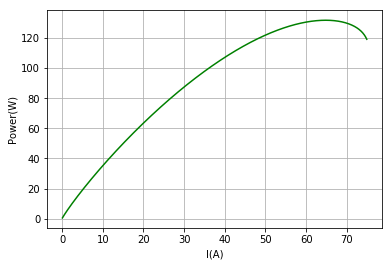

In [23]:
plot_func(data["I"],data["P"],"I(A)","Power(W)")

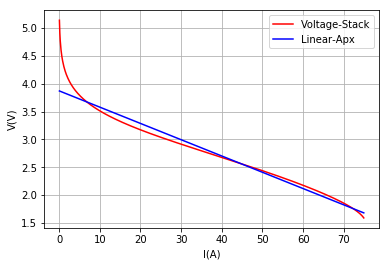

In [24]:
plot_func(data["I"],[data["V"],data["VE"]],"I(A)","V(V)",["red","blue"],legend=["Voltage-Stack","Linear-Apx"],multi=True)

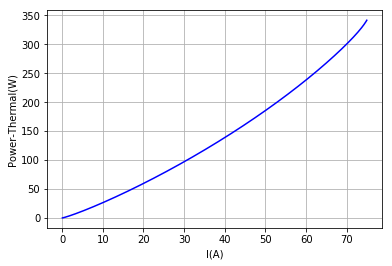

In [25]:
plot_func(data["I"],data["Ph"],"I(A)","Power-Thermal(W)","blue")

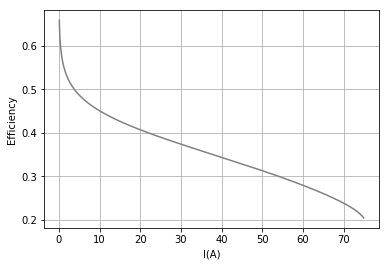

In [26]:
plot_func(data["I"],data["EFF"],"I(A)","Efficiency","gray")

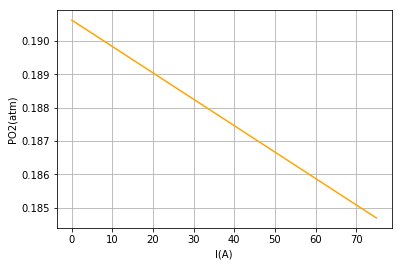

In [27]:
plot_func(data["I"],data["PO2"],"I(A)","PO2(atm)","orange")

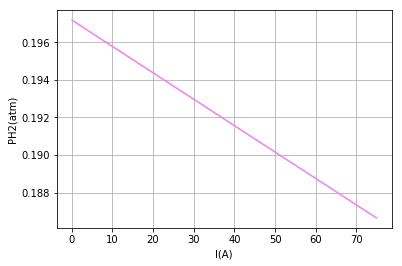

In [28]:
plot_func(data["I"],data["PH2"],"I(A)","PH2(atm)","violet")

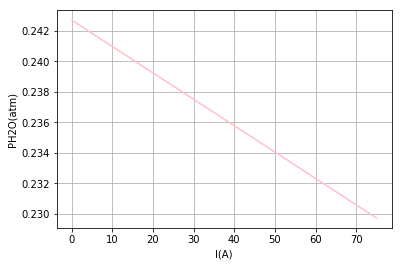

In [29]:
plot_func(data["I"],data["PH2O"],"I(A)","PH2O(atm)","pink")

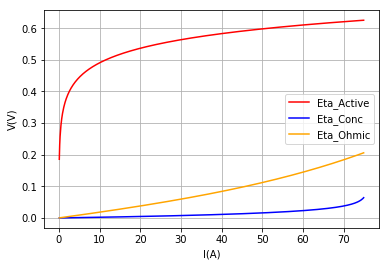

In [30]:
plot_func(data["I"],[data["Eta_Active"],data["Eta_Conc"],data["Eta_Ohmic"]],"I(A)","V(V)",["red","blue","orange"],
          legend=["Eta_Active","Eta_Conc","Eta_Ohmic"],multi=True)

<a href="Padulles-Amphlett/Padulles_Amphlett_Test.html">HTML File</a>

<a href="Padulles-Amphlett/Padulles_Amphlett_Test.opem">OPEM File</a>

<a href="Padulles-Amphlett/Padulles_Amphlett_Test.csv">CSV File</a>

## Parameters

Inputs, Constants & Middle Values
1. User : User input
2. System : Simulator calculation (middle value)

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
        <td>$$Value$$</td>
    </tr> 
    <tr>
        <td>$$T$$</td>
        <td style="text-align:center;">Fuel cell temperature</td>
        <td>$$K$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$N_0$$</td>
        <td style="text-align:center;">Number of cells</td>
        <td>$$--$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$E_0$$</td>
        <td style="text-align:center;">No load voltage</td>
        <td>$$V$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$K_{H_2}$$</td>
        <td style="text-align:center;">Hydrogen valve constant</td>
        <td>$$kmol.s^{-1}.atm^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$K_{H_2O}$$</td>
        <td style="text-align:center;">Water valve constant</td>
        <td>$$kmol.s^{-1}.atm^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$K_{O_2}$$</td>
        <td style="text-align:center;">Oxygen valve constant</td>
        <td>$$kmol.s^{-1}.atm^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$\tau_{H_2}^{(s)}$$</td>
        <td style="text-align:center;">Hydrogen time constant</td>
        <td>$$s$$</td>
        <td>$$User$$</td>
    </tr>
     <tr>
        <td>$$\tau_{H_2O}^{(s)}$$</td>
        <td style="text-align:center;">Water time constant</td>
        <td>$$s$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$\tau_{O_2}^{(s)}$$</td>
        <td style="text-align:center;">Oxygen time constant</td>
        <td>$$s$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$l$$</td>
        <td style="text-align:center;">Membrane thickness</td>
        <td>$$cm$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$A$$</td>
        <td style="text-align:center;">Active area</td>
        <td>$$cm^2$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$\tau_{1}^{(s)}$$</td>
        <td style="text-align:center;">Reformer time constant</td>
        <td>$$s$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$\tau_{2}^{(s)}$$</td>
        <td style="text-align:center;">Reformer time constant</td>
        <td>$$s$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$CV$$</td>
        <td style="text-align:center;">Conversion factor</td>
        <td>$$--$$</td>
        <td>$$User$$</td>
    </tr>
      <tr>
        <td>$$R_{electronic}$$</td>
        <td style="text-align:center;">R-Electronic</td>
        <td>$$\Omega$$</td>
        <td>$$User$$</td>
    </tr>
     <tr>
        <td>$$\lambda$$</td>
        <td style="text-align:center;">An adjustable parameter with a possible minimum value of 14 and a maximum value of 23</td>
        <td>$$--$$</td>
        <td>$$User$$</td>
    </tr>
     <tr>
        <td>$$J_{Max}$$</td>
        <td style="text-align:center;">Maximum current density of the cell</td>
        <td>$$Acm^{-2}$$</td>
        <td>$$User$$</td>
    </tr>
      <tr>
        <td>$$r_{h-o}$$</td>
        <td style="text-align:center;">Hydrogen-Oxygen flow ratio</td>
        <td>$$--$$</td>
        <td>$$User$$</td>
    </tr>
       <tr>
        <td>$$q_{methanol}$$</td>
        <td style="text-align:center;">Molar flow of methanol</td>
        <td>$$kmol.s^{-1}$$</td>
        <td>$$User$$</td>
     <tr>
        <td>$$i_{start}$$</td>
        <td style="text-align:center;">Cell operating current start point</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$i_{step}$$</td>
        <td style="text-align:center;">Cell operating current step</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$i_{stop}$$</td>
        <td style="text-align:center;">Cell operating current end point</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$B$$</td>
        <td style="text-align:center;">Constant in the mass transfer term</td>
        <td>$$V$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$P_{H_2}$$</td>
        <td style="text-align:center;">Hydrogen partial pressure</td>
        <td>$$atm$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$P_{H_2O}$$</td>
        <td style="text-align:center;">Water partial pressure</td>
        <td>$$atm$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$P_{O_2}$$</td>
        <td style="text-align:center;">Oxygen partial pressure</td>
        <td>$$atm$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$K_r$$</td>
        <td style="text-align:center;">Modeling constant</td>
        <td>$$kmol.s^{-1}.A^{-1}$$</td>
        <td>$$System$$</td>
    </tr>
      <tr>
        <td>$$q_{O_2}^{(inlet)}$$</td>
        <td style="text-align:center;">Molar flow of oxygen</td>
        <td>$$kmol.s^{-1}$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$q_{H_2O}^{(inlet)}$$</td>
        <td style="text-align:center;">Molar flow of water</td>
        <td>$$kmol.s^{-1}$$</td>
        <td>$$System$$</td>
    </tr>
    <tr>
        <td>$$q_{H_2}^{(inlet)}$$</td>
        <td style="text-align:center;">Molar flow of hydrogen</td>
        <td>$$kmol.s^{-1}$$</td>
        <td>$$System$$</td>
    </tr>
    <tr>
        <td>$$J$$</td>
        <td style="text-align:center;">Actual current density of the cell </td>
        <td>$$Acm^{-2}$$</td>
        <td>$$System$$</td>
    </tr> 
    <tr>
        <td>$$C_{O_2}$$</td>
        <td style="text-align:center;">Concentration of oxygen in the catalytic interface of the cathode</td>
        <td>$$molcm^{-3}$$</td>
        <td>$$System$$</td>
    </tr> 
     <tr>
        <td>$$C_{H_2}$$</td>
        <td style="text-align:center;">Concentration of hydrogen in the catalytic interface of the anode</td>
        <td>$$molcm^{-3}$$</td>
        <td>$$System$$</td>
    </tr> 
    <tr>
        <td>$$R_{Proton}$$</td>
        <td style="text-align:center;">Resistance to proton flow</td>
        <td>$$\Omega$$</td>
        <td>$$System$$</td>
    </tr> 
     <tr>
        <td>$$\xi_2$$</td>
        <td style="text-align:center;">Parametric coefficients for cell model</td>
        <td>$$--$$</td>
        <td>$$System$$</td>
    </tr> 
     <tr>
        <td>$$\xi_1$$</td>
        <td style="text-align:center;">Parametric coefficients for cell model</td>
        <td>$$--$$</td>
        <td>$$-0.948$$</td>
    </tr> 
     <tr>
        <td>$$\xi_3$$</td>
        <td style="text-align:center;">Parametric coefficients for cell model</td>
        <td>$$--$$</td>
        <td>$$7.6\times10^{-5}$$</td>
    </tr> 
     <tr>
        <td>$$\xi_4$$</td>
        <td style="text-align:center;">Parametric coefficients for cell model</td>
        <td>$$--$$</td>
        <td>$$-1.93\times10^{-4}$$</td>
    </tr>
               <tr>
        <td>$$\mu_F$$</td>
        <td style="text-align:center;">The fuel utilization</td>
        <td>$$--$$</td>
        <td>$$0.95$$</td>
    </tr>
          <tr>
    <td>$$HHV$$</td>
        <td style="text-align:center;">Higher heating value potential</td>
        <td>$$V$$</td>
        <td>$$1.482$$</td>
    </tr>
             <tr>
    <td>$$R$$</td>
        <td style="text-align:center;">Universal gas constant</td>
        <td>$$J.kmol^{-1}.K^{-1}$$</td>
        <td>$$8314.47$$</td>
    </tr>
             <tr>
    <td>$$F$$</td>
        <td style="text-align:center;">Faraday’s constant</td>
        <td>$$C.kmol^{-1}$$</td>
        <td>$$96484600$$</td>
    </tr>
    <tr>
    <td>$$E_{th}$$</td>
        <td style="text-align:center;">Theoretical potential</td>
        <td>$$V$$</td>
        <td>$$1.23$$</td>
    </tr>
    
    
    
</table>

* Notice : $$q_{H_2}=q_{H_2O}$$

## Reference
<blockquote>
1- J. Padulles, G.W. Ault, J.R. McDonald. 2000. "An integrated SOFC plant dynamic model for power systems
simulation." Journal of Power Sources (Elsevier) 86 (1-2): 495-500. doi:10.1016/S0378-7753(99)00430-9
</blockquote>
<blockquote>
2- Hauer, K.-H. 2001. "Analysis tool for fuel cell vehicle hardware and software (controls) with an application
to fuel economy comparisons of alternative system designs." Ph.D. dissertation, Transportation Technology
and Policy, University of California Davis.
</blockquote>
<blockquote>
3- J. C. Amphlett, R. M. Baumert, R. F. Mann, B. A. Peppley, and P. R. Roberge. 1995. "Performance Modeling
of the Ballard Mark IV Solid Polymer Electrolyte Fuel Cell." J. Electrochem. Soc. (The Electrochemical Society,
Inc.) 142 (1): 9-15. doi: 10.1149/1.2043959.
</blockquote>
<blockquote>
4-Larminie, J., Dicks, A., & McDonald, M. S. 2003. Fuel cell systems explained (Vol. 2, pp. 207-225). Chichester, UK: J. Wiley. doi: 10.1002/9781118706992.
</blockquote>